<a href="https://colab.research.google.com/github/LezendarySandwich/CSL7550-Stock-Price-Prediction/blob/master/CNN_RELIANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt 

if not os.path.exists('/content/drive'):
  drive.mount('/content/drive')

In [ ]:
from datetime import date

STORAGE = '/content/drive/MyDrive' #@param {type : "string"}
KAGGLE_DIR = 'Kaggle' #@param {type : "string"}
KAGGLE_JSON_PATH = os.path.join(STORAGE, KAGGLE_DIR)
QUANDL_PATH = os.path.join(KAGGLE_JSON_PATH, '.quandl')
__PROJECT = os.path.join(STORAGE, 'Neo')
ML_DATASET = os.path.join(__PROJECT, 'dataset')
START_DATE = date(2014, 1, 1)
END_DATE = date(2019,1,1)
STOCK = 'RELIANCE'#@param {type : "string"}
SAVE_DIR = os.path.join(ML_DATASET, f'{STOCK}_{START_DATE}_{END_DATE}')
TEST_DS = os.path.join(SAVE_DIR,'dataset_test.csv')
TRAIN_DS = os.path.join(SAVE_DIR,'dataset_train.csv')

In [ ]:
train_df= pd.read_csv(TRAIN_DS,index_col='Date')
test_df= pd.read_csv(TEST_DS,index_col='Date')
train_df

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-01,897.45,898.25,887.60,888.80,1337074.0
2014-01-02,887.70,896.00,870.10,875.00,1376901.0
2014-01-03,871.60,873.35,855.00,864.25,2933613.0
2014-01-06,862.10,863.25,850.00,854.95,3043781.0
2014-01-07,854.60,859.95,840.05,842.10,3957111.0
...,...,...,...,...,...
2017-12-22,914.65,922.40,909.30,920.40,4872675.0
2017-12-26,924.85,938.90,918.15,929.80,5301456.0
2017-12-27,933.00,937.50,919.00,923.75,4352384.0


In [ ]:
df= pd.concat((train_df[['Open','High','Low','Close','Volume']],test_df[['Open','High','Low','Close','Volume']]),axis=0)
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-01,897.45,898.25,887.60,888.80,1337074.0
2014-01-02,887.70,896.00,870.10,875.00,1376901.0
2014-01-03,871.60,873.35,855.00,864.25,2933613.0
2014-01-06,862.10,863.25,850.00,854.95,3043781.0
2014-01-07,854.60,859.95,840.05,842.10,3957111.0
...,...,...,...,...,...
2018-12-26,1085.80,1100.00,1065.65,1098.35,7210059.0
2018-12-27,1107.20,1127.00,1104.00,1120.20,12478000.0
2018-12-28,1125.50,1135.25,1121.20,1125.55,7666016.0


In [ ]:
if(STOCK=='TCS'): #TCS stock split
 df=df[:1085]
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-01,897.45,898.25,887.60,888.80,1337074.0
2014-01-02,887.70,896.00,870.10,875.00,1376901.0
2014-01-03,871.60,873.35,855.00,864.25,2933613.0
2014-01-06,862.10,863.25,850.00,854.95,3043781.0
2014-01-07,854.60,859.95,840.05,842.10,3957111.0
...,...,...,...,...,...
2018-12-26,1085.80,1100.00,1065.65,1098.35,7210059.0
2018-12-27,1107.20,1127.00,1104.00,1120.20,12478000.0
2018-12-28,1125.50,1135.25,1121.20,1125.55,7666016.0


In [ ]:
pd.set_option("display.max_rows", 100)
if STOCK=='RELIANCE':
  df=df[:850]
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-01,897.45,898.25,887.60,888.80,1337074.0
2014-01-02,887.70,896.00,870.10,875.00,1376901.0
2014-01-03,871.60,873.35,855.00,864.25,2933613.0
2014-01-06,862.10,863.25,850.00,854.95,3043781.0
2014-01-07,854.60,859.95,840.05,842.10,3957111.0
...,...,...,...,...,...
2017-06-07,1311.20,1342.00,1309.00,1339.00,2559954.0
2017-06-08,1340.00,1344.80,1328.05,1331.70,1806521.0
2017-06-09,1345.10,1352.95,1331.00,1335.70,3162802.0


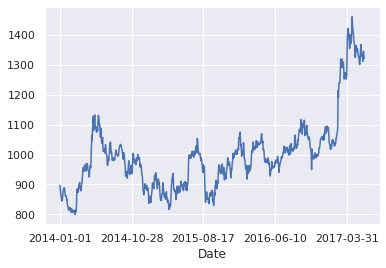

In [ ]:
df['Open'].plot()

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Input,Dropout, LSTM, MaxPooling1D, GlobalAveragePooling1D, AveragePooling1D
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

import os
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [ ]:
scaler = StandardScaler()
train_x = scaler.fit_transform(df[["Open","High","Low","Close","Volume"]])

In [ ]:
def create_dataset(data,start,end,time_step=1,):
    dataX, dataY = [], []
    for i in range(start,end):
        dataX.append(data[i-time_step:i, :])
        dataY.append(data[i , 0])
    return np.array(dataX), np.array(dataY)

time_step = 60
X_train, y_train = create_dataset(train_x,60,len(train_x)-60,60)
X_test, y_test = create_dataset(train_x,len(train_x)-60,len(train_x),60)

In [ ]:
X_test

array([[[ 0.44979675,  0.41112704,  0.52618488,  0.48212874,
         -0.42749907],
        [ 0.49269537,  0.46063557,  0.55868679,  0.52474955,
          0.45965742],
        [ 0.47601257,  0.42409356,  0.50852953,  0.44588114,
          1.33099342],
        ...,
        [ 2.54746001,  2.43861954,  2.38882509,  2.32717159,
          1.21572078],
        [ 2.32740596,  2.4174016 ,  2.43015468,  2.45025411,
          0.84192314],
        [ 2.47794835,  2.37103646,  2.4558352 ,  2.39209862,
          0.00544849]],

       [[ 0.49269537,  0.46063557,  0.55868679,  0.52474955,
          0.45965742],
        [ 0.47601257,  0.42409356,  0.50852953,  0.44588114,
          1.33099342],
        [ 0.42834743,  0.4736021 ,  0.51695595,  0.47734884,
         -0.57295813],
        ...,
        [ 2.32740596,  2.4174016 ,  2.43015468,  2.45025411,
          0.84192314],
        [ 2.47794835,  2.37103646,  2.4558352 ,  2.39209862,
          0.00544849],
        [ 2.46205998,  2.44608512,  2.49154717, 

In [ ]:
  # define the model
model = Sequential()
model.add(Conv1D(filters=128,kernel_size=7,strides=1, activation="leaky_relu"))
model.add(AveragePooling1D())
model.add(Conv1D(filters=64,kernel_size=5,strides=1, activation="leaky_relu"))
model.add(Dropout(0.4))
model.add(Conv1D(filters=32,kernel_size=3,strides=1, activation="leaky_relu"))
model.add(AveragePooling1D())
model.add(Conv1D(filters=16,kernel_size=3,strides=1, activation="leaky_relu"))
model.add(Dropout(0.4))
model.add(Conv1D(filters=8,kernel_size=3,strides=1, activation="leaky_relu"))
model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation='leaky_relu'))
# compile the model
model.compile(optimizer='adam', loss='mse')


In [ ]:

cnn_result = model.fit(X_train,y_train,epochs=300,batch_size=30,verbose=1)

Epoch 1/300
25/25 [==============================] - 1s 7ms/step - loss: 0.3014
Epoch 2/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2232
Epoch 3/300
25/25 [==============================] - 0s 7ms/step - loss: 0.1600
Epoch 4/300
25/25 [==============================] - 0s 7ms/step - loss: 0.1410
Epoch 5/300
25/25 [==============================] - 0s 6ms/step - loss: 0.1299
Epoch 6/300
25/25 [==============================] - 0s 7ms/step - loss: 0.1104
Epoch 7/300
25/25 [==============================] - 0s 7ms/step - loss: 0.1155
Epoch 8/300
25/25 [==============================] - 0s 7ms/step - loss: 0.0989
Epoch 9/300
25/25 [==============================] - 0s 7ms/step - loss: 0.0968
Epoch 10/300
25/25 [==============================] - 0s 7ms/step - loss: 0.0822
Epoch 11/300
25/25 [==============================] - 0s 8ms/step - loss: 0.0790
Epoch 12/300
25/25 [==============================] - 0s 7ms/step - loss: 0.0819
Epoch 13/300
25/25 [=================

In [ ]:
pred=model.predict(X_train)

In [ ]:
def reshape_1d(ar):
  sz=len(ar)
  app=np.zeros((sz,4))
  #print(app.shape)
  nar= ar.copy()
  nar= np.reshape(nar,(sz,1))
  #print(ar.shape)
  xar= np.concatenate((nar,app),axis=1)
  #print(xar.shape)
  #print(xar)
  return xar


In [ ]:
def scale_back(arr):
  narr=reshape_1d(arr)
  narr=scaler.inverse_transform(narr)
  return narr[:,0]


In [ ]:
pred_i= scale_back(pred)
y_train_i= scale_back(y_train)


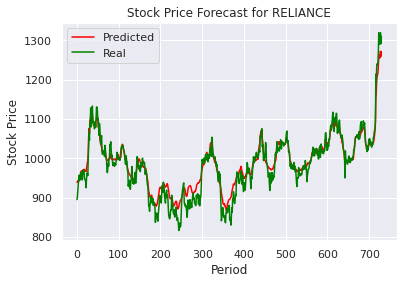

In [ ]:
plt.plot(pred_i, color="red", label= "Predicted")
plt.plot(y_train_i, color="green", label= "Real")
plt.xlabel("Period")
plt.ylabel("Stock Price")
plt.title(f'Stock Price Forecast for {STOCK}')
plt.legend()
plt.show()

In [ ]:
pred=model.predict(X_test)


In [ ]:
pred_i= scale_back(pred)
ytest_i= scale_back(y_test)

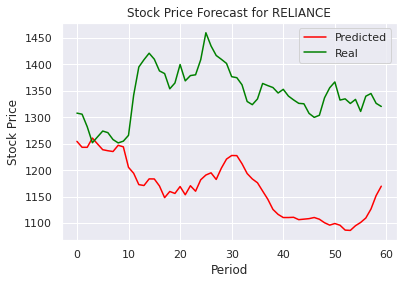

In [ ]:
plt.plot(pred_i, color="red", label= "Predicted")
plt.plot(ytest_i, color="green", label= "Real")
plt.xlabel("Period")
plt.ylabel("Stock Price")
plt.title(f'Stock Price Forecast for {STOCK}')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

test=ytest_i
pred=pred_i
import math 

from sklearn.metrics import mean_squared_error 
from math import sqrt 
 
MAE = mean_absolute_error(test, pred) 
MSE = mean_squared_error(test, pred) 
RMSE = math.sqrt(MSE)
R2 = r2_score(test, pred) 
real_arima_stock_price_mean = test.mean()


print("Mean Absolute Error:", MAE)
print("Mean Squared Error:", MSE)
print("Root Mean Squared Error:", RMSE)
print("R Squared:", R2)
print("Real Stock Price Mean:", real_arima_stock_price_mean)
print("RMSE/REAL_STOCK_PRICE_MEAN:", RMSE/real_arima_stock_price_mean) 

Mean Absolute Error: 178.18984266880378
Mean Squared Error: 37609.71182058857
Root Mean Squared Error: 193.93223512502652
R Squared: -15.005246037985792
Real Stock Price Mean: 1344.4283333333337
RMSE/REAL_STOCK_PRICE_MEAN: 0.14424884563701285
